<hr/>

# EN.520.637 Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab 3: Infinite Horizon MDPs (40 points)  </font></h1>



## Requirements
Make sure that the file gridworld.py is in the same directory as your notebook.


## Deadline
11:59 pm Oct 9th, 2023

##  Content
In this assignment we will investigate two algorithms for infinite-horizon MDPs. Namely:

* Policy Evaluation & Value Iteration (GridWorld)
* Policy Iteration (Machine-repair problem of the homework)


In [1]:
# Imports
import numpy as np

## Problem 1. Policy Evaluation & Value Iteration (20 points)



### 1.1 The GridWorld


**(Simple) Tabular Grid-World**

You can visualize the grid worlds we will train our agents on, by running the cells below.
`S` indicates the start state and `G` indicates the goal.  

At every step, the agent can choose one of the four actions: "up","right","down","left", moving to the next tile in that direction. If the agent chooses to move into a wall, he "bumps" into it and remains in the same place.

Rewards are: `-5` for bumping into a wall, `+10` for reaching the goal, and `0` otherwise.  The episode ends when the agent reaches the goal, and otherwise continues.  


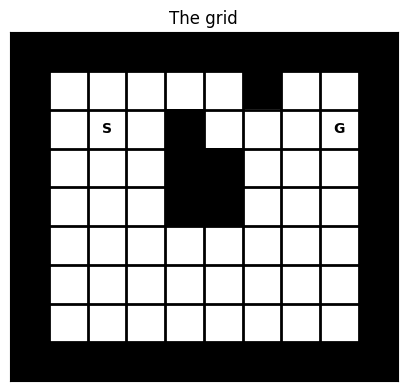

In [2]:
from gridworld import GridWorld

gw = GridWorld()
gw.plot_grid(plot_title='The grid')

### Task 1.1.1 Answer the following questions [3 Points]

Under a discounted setting $\gamma<1$:
1. Describe what is an optimal policy for this problem
2. Is the optimal policy unique? Justify your answer

3. How do your answers change for an undiscounted setting $\gamma=1$?

**Your answer**
1. We can formalize this problem as an Episodic task by Infinite Horizon $T$ with discount rate $\gamma$. Let $S$ be the state random variable representing the grid position, then the MDP ends when $S_T=G$. By definition, the optimal policy is
$$\pi^*=\arg\max_{\pi\in \Pi}\mathbb{E}_\pi\left[\sum_{k=0}^\infty \gamma^{k}R_{k+1}|S_0=s\right], 0\leq \gamma<1.$$
Combining with the fact that $R_{k+1}\in \{-5,0,10\}$, where $R_{k+1}=-5$ if bumping into the wall, $R_{k+1}=10$ if $S_T=G$, and $R_{k+1}=0$ otherwise, this yields the optimal policy is the shortest path from $S_0=s$ to $S_T=G$ s.t. there is no bumping into the wall in this path. So, an optimal policy for this problem is
$$\text{(up,right,right,right,down,right,right,right)}.$$

2. We can see that there is more than 1 shortest path from $S_0=s$ to $S_T=G$ s.t. there is no bumping into the wall in this path, so the optimal policy is not unique. E.g., another optimal policy for this problem can be
$$\text{(right,up,right,right,down,right,right,right)}.$$

3. When $\gamma=1$, this problem becomes an Episodic task by Infinite Horizon $T$ with an undiscounted rate. So, the $\gamma$ doesn't weigh the reward at every step, hence, the length of the path doesn't matter anymore. As a result, the optimal policy is not necessarily the shortest path, it can be any path $S_0=s$ to $S_T=G$ s.t. there is no bumping into the wall in this path. E.g.,
$$\text{(left,up,right,right,right,right,down,right,right,right)}.$$

### 1.1.2 States and state values
Excluding the wall around the grid, there are 56 tiles (INCLUDING obstacles inside the grid), and they correspond to 56 states (obstacles and goal are non-reachable states).

We use numbers from 0 to 55 to represent these states (see gridworld.py for the coversion between integer and tile position). The correspondance are as shown below:

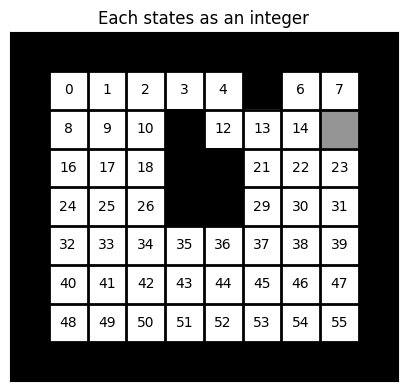

In [3]:
gw.plot_state_values(np.arange(56),value_format="{:d}",plot_title='Each states as an integer')

### 1.1.3 Taking actions
Use `GridWorld.step(action)` to take an action, and use `GridWorld.reset()` to restart an episode.

`action` is an integer from 0 to 3, denoting

0: "Up"; 1: "Right"; 2: "Down"; 3: "Left"


The method `Gridworld.step()` returns a tuple `r, done, next_s` where `r` is the stage-reward, `done` is a boolean indicating episode termination and `next_s` is the next state.


In [4]:
# Reset the state to 'S'
gw.reset()

# Get the current state
current_state = gw.get_current_state()
tile_pos = gw.int_to_state(current_state)
print("The current state is {}, which corresponds to tile position {}\n".format(current_state,tile_pos))

# Take a random action
action = np.random.randint(4)
reward, terminated, next_state = gw.step(action)
tile_pos = gw.int_to_state(next_state)
print("Take action {}, get reward {}, move to state {}".format(action,reward,next_state))
print("Now the current state is {}, which corresponds to tile position {}\n".format(next_state,tile_pos))

# Reset to state 'S'
gw.reset()
current_state = gw.get_current_state()
tile_pos = gw.int_to_state(current_state)
print("Reset episode")
print("Now the current state is {}, which corresponds to tile position {}".format(current_state,tile_pos))



The current state is 9, which corresponds to tile position (1, 1)

Take action 2, get reward 0.0, move to state 17
Now the current state is 17, which corresponds to tile position (2, 1)

Reset episode
Now the current state is 9, which corresponds to tile position (1, 1)


### 1.1.4 Plotting Deterministic Policies
A deterministic policy is a function from state to action, which can be represented by a (56,)-numpy array whose entries are all integers in (0-3)

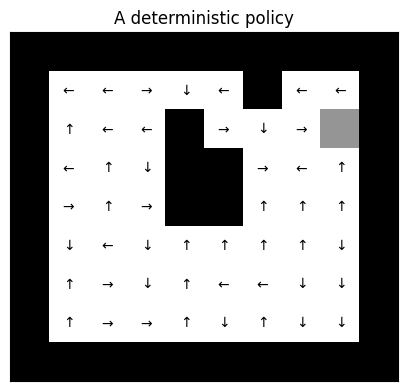

In [5]:
gw.plot_policy(np.random.randint(4,size=(56,)),plot_title='A deterministic policy')

### 1.2 Policy Evaluation

Recall that the value function $v_\pi(s)$ of a fixed policy $\pi(s)$ can be iteratively computed via Policy Evaluation (See Sutton&Barto Section 4.1), the iteration is given by $$v_{k+1}(s)=\sum_{a}\pi(a|s)\sum_{s',r}p(s',r|s,a)[r+\gamma v_{k}(s)]\,,$$ which can be written as
$$
    v_{k+1}(s)=\sum_{a}\pi(a|s)\left[\mathbb{E}_\pi[r|s,a]+\gamma\sum_{s'}p(s'|s,a)v_k(s')\right]\,.
$$
If we write the value function $v_{k+1},v_k$ as vectors, then we have
$$
    v_{k+1} = \sum_{a}\pi(a|s)\left[R_\pi(a)+\gamma P_\pi(a)v_{k}\right]\,.
$$
where $R_\pi(a)$ is the expected reward under action $a$ and  $P_\pi(a)$ is the transition probability matrix under action $a$.

With this we can find the value function $v_\pi$ of random policy $\pi$ when discount is 0.9, the code is shown below



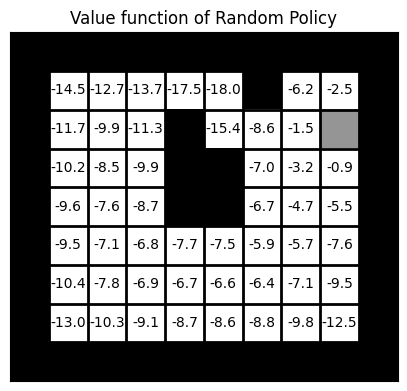

In [6]:
pi_a = [0.25,0.25,0.25,0.25] # Uniformly-random policy (takes each action with equal probability, for all states)

gamma = 0.9
max_it = 1000  # Maximum number of iterations
tol = 1e-5  # Tolerance
v = np.zeros((56,))

for i in range(max_it):
    value_temp = np.zeros((56,))
    for action in range(4):
        reward, tran_prob = gw.transition(action)
        value_temp = value_temp + pi_a[action]*(reward+gamma* np.matmul(tran_prob,v))

    if np.linalg.norm(value_temp-v)<tol:  # Termination condition
        break
    else:
        v = value_temp


gw.plot_state_values(v,value_format="{:.1f}",plot_title='Value function of Random Policy')

### Task 1.2.1 [Coding, 7 points]
Compute and plot the greedy policy corresponding to the value function above.

Hint: First compute the Q values from `v` above.

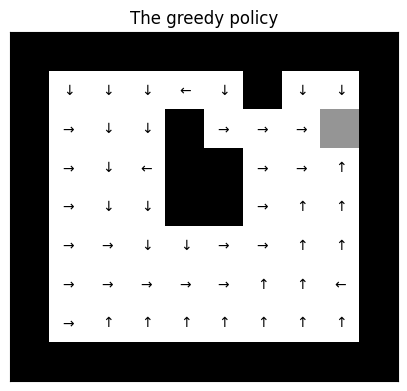

In [7]:
# Answer: Your code here
def convert_state2int(row, col):
  idx = row * 8 + col
  return idx

def get_policy_from_v(v_value):
  ignore_position = [5, 11, 19, 20, 27, 28]
  q_values = np.zeros((56,), dtype=int)

  for i in range(56):
    tile_pos = gw.int_to_state(i)
    opt_pos = -1
    max_v = -np.inf
    ##Up
    if tile_pos[0] - 1 >= 0:
      int_pos = convert_state2int(tile_pos[0] - 1, tile_pos[1])
      if int_pos == 15:
        q_values[i] = 0
        continue
      elif int_pos not in ignore_position and max_v <= v_value[int_pos]:
        max_v = v_value[int_pos]
        opt_pos = 0
    ##Right
    if tile_pos[1] + 1 <= 7:
      int_pos = convert_state2int(tile_pos[0], tile_pos[1] + 1)
      if int_pos == 15:
        q_values[i] = 1
        continue
      elif int_pos not in ignore_position and max_v <= v_value[int_pos]:
        max_v = v_value[int_pos]
        opt_pos = 1
    ##Down
    if tile_pos[0] + 1 <= 6:
      int_pos = convert_state2int(tile_pos[0] + 1, tile_pos[1])
      if int_pos == 15:
        q_values[i] = 2
        continue
      elif int_pos not in ignore_position and max_v <= v_value[int_pos]:
        max_v = v_value[int_pos]
        opt_pos = 2
    ##Left
    if tile_pos[1] - 1 >= 0:
      int_pos = convert_state2int(tile_pos[0], tile_pos[1] - 1)
      if int_pos == 15:
        q_values[i] = 3
        continue
      elif int_pos not in ignore_position and max_v <= v_value[int_pos]:
        max_v = v_value[int_pos]
        opt_pos = 3
    q_values[i] = opt_pos

  return q_values

gw.plot_policy(get_policy_from_v(v),plot_title='The greedy policy')


## 1.3 Value Iteration



### Task 1.3.1 [Coding, 10 points]

Implement Value Iteration Algorithm [Sutton&Barto Section 4.4] to find the optimal policy of this gridworld, and plot its value function.



In [8]:
from numpy.core.fromnumeric import var
# Value Iteration Algorithm

def value_iteration(gridworld, gamma):
  # input:  gridworld, (GridWorld class) gridworld class describing the environment
  #         gamma,     (float 0-1) discount of the return
  # output: optim value,  (1d numpy array, float) optimal value function
  #         optim_policy, (1d numpy array, int {0,1,2,3}) optimal policy

  #write your code here
  max_it = 1000  # Maximum number of iterations
  tol = 1e-5  # Tolerance
  v = np.zeros((56,))
  ignore_position = [5, 11, 19, 20, 27, 28]
  for i in range(max_it):
    delta = 0
    for j in range(56):
      if j in ignore_position or j == 15:
        continue
      value_tmp = v[j]
      max_tmp = -np.Inf
      tile_pos = gw.int_to_state(j)
      ##Up
      if tile_pos[0] - 1 >= 0:
        int_pos = convert_state2int(tile_pos[0] - 1, tile_pos[1])
        if int_pos == 15:
          v[j] = 10
          continue
        elif int_pos in ignore_position and max_tmp <= -5:
          max_tmp = -5
        elif int_pos not in ignore_position and max_tmp <= gamma*v[int_pos]:
          max_tmp = gamma*v[int_pos]
      else:
        if max_tmp <= -5:
          max_tmp = -5
      ##Right
      if tile_pos[1] + 1 <= 7:
        int_pos = convert_state2int(tile_pos[0], tile_pos[1] + 1)
        if int_pos == 15:
          v[j] = 10
          continue
        elif int_pos in ignore_position and max_tmp <= -5:
          max_tmp = -5
        elif int_pos not in ignore_position and max_tmp <= gamma*v[int_pos]:
          max_tmp = gamma*v[int_pos]
      else:
        if max_tmp <= -5:
          max_tmp = -5
      ##Down
      if tile_pos[0] + 1 <= 6:
        int_pos = convert_state2int(tile_pos[0] + 1, tile_pos[1])
        if int_pos == 15:
          v[j] = 10
          continue
        elif int_pos in ignore_position and max_tmp <= -5:
          max_tmp = -5
        elif int_pos not in ignore_position and max_tmp <= gamma*v[int_pos]:
          max_tmp = gamma*v[int_pos]
      else:
        if max_tmp <= -5:
          max_tmp = -5
      ##Left
      if tile_pos[1] - 1 >= 0:
        int_pos = convert_state2int(tile_pos[0], tile_pos[1] - 1)
        if int_pos == 15:
          v[j] = 10
          continue
        elif int_pos in ignore_position and max_tmp <= -5:
          max_tmp = -5
        elif int_pos not in ignore_position and max_tmp <= gamma*v[int_pos]:
          max_tmp = gamma*v[int_pos]
      else:
        if max_tmp <= -5:
          max_tmp = -5

      #Update by the max value regarding all possible actions at this state
      v[j] = max_tmp
      delta = max(delta, np.absolute(value_tmp - v[j]))

    if delta < tol:
      break

  optim_value = v
  optim_policy = get_policy_from_v(optim_value)

  return optim_value, optim_policy

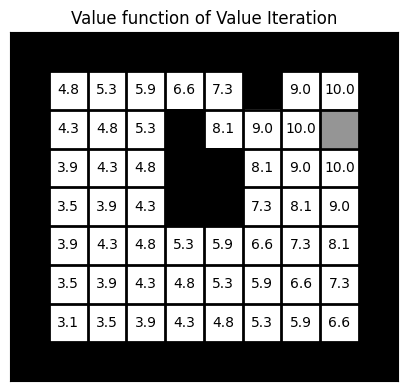

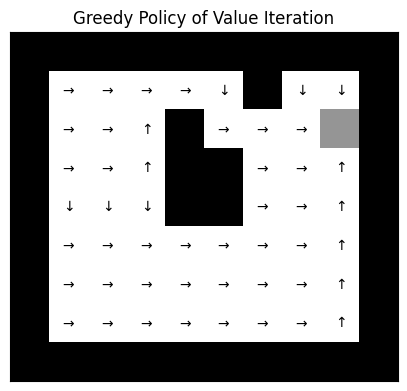

In [9]:
# check your result here
optim_value, optim_policy = value_iteration(gw, 0.9)
gw.plot_state_values(optim_value,value_format="{:.1f}",plot_title='Value function of Value Iteration')
gw.plot_policy(optim_policy,plot_title='Greedy Policy of Value Iteration')

## Problem 2. Policy Iteration (HW2: P3) [20 points]

#### Suppose we have a machine that is either running or is broken down.  If it runs through-out one week, it makes a gross profit of \\$120. If it fails during the week, gross profit is zero. If it is running at the start of the week and we perform preventive maintenance,the probability that it will fail during the week is 0.4.  If we do not perform such maintenance, the probability of failure is 0.7. However, maintenance will cost \\$20.  When the machine is broken down at the start of the week (it failed during the week before),it may either be repaired at a cost of \\$60, in which case it will fail during the week with a probability of 0.4, or it may be replaced at a cost of \\$120 by a new machinethat is guaranteed to run through its first week of operation.

### Task 2.1 [Coding, 15 points]

Implement Policy Iteration Algorithm [Sutton&Barto Section 4.3] to find the optimal policy of this problem respectively for $\gamma = 0.9$ and $\gamma = 0.4$

In [10]:
# Write auxiliary functions here
def policy_eval(v, policy, gamma, max_it, tol):
  for i in range(max_it):
    delta = 0

    value_tmp = v[0]
    if policy[0] == 0:
      v[0] = 0.4 * (-60 + gamma * v[0]) + 0.6 * (60 + gamma * v[1])
    else:
      v[0] = 1 * (gamma * v[1])
    delta = max(delta, np.absolute(value_tmp-v[0]))

    value_tmp = v[1]
    if policy[1] == 0:
      v[1] = 0.4 * (-20 + gamma * v[0]) + 0.6 * (100 + gamma * v[1])
    else:
      v[1] = 0.7 * (0 + gamma * v[0]) + 0.3 * (120 + gamma * v[1])
    delta = max(delta, np.absolute(value_tmp-v[1]))

    if delta < tol:
      break

  return v

def convert_int2string_policy(policy_int):
  policy_str = ["", ""]
  if policy_int[0] == 0:
    policy_str[0] = "Repair"
  else:
    policy_str[0] = "Replace"
  if policy_int[1] == 0:
    policy_str[1] = "Maintenance"
  else:
    policy_str[1] = "Not maintenance"
  return policy_str

In [11]:
def policy_iter(gamma,max_it,tol):
  # input:  gamma,     (float) discount of the return
  #         max_it     (int) maximum number of iterations
  #         tol        (float) tolerance to be checked
  # output:
  #         optim_policy, (1d numpy array, int {0,1}) optimal policy

  #0: broken, 1: working
  policy = np.random.choice([0, 1], size=(2,), p=[0.5, 0.5])
  v = np.array([0, 0])
  v = policy_eval(v, policy, gamma, max_it, tol)
  while True:
    policy_stable = True

    old_action = policy[0]
    #0: repair, 1: replace
    tmp_policy = 0
    tmp_repair = 0.4 * (-60 + gamma * v[0]) + 0.6 * (60 + gamma * v[1])
    tmp_replace = 1 * (gamma * v[1])
    if tmp_replace > tmp_repair:
      tmp_policy = 1
    policy[0] = tmp_policy
    if old_action != policy[0]:
      policy_stable = False

    old_action = policy[1]
    #0: maintenance, 1: not maintenance
    tmp_policy = 0
    tmp_mtn = 0.4 * (-20 + gamma * v[0]) + 0.6 * (100 + gamma * v[1])
    tmp_not = 0.7 * (0 + gamma * v[0]) + 0.3 * (120 + gamma * v[1])
    if tmp_not > tmp_mtn:
      tmp_policy = 1
    policy[1] = tmp_policy
    if old_action != policy[1]:
      policy_stable = False

    if policy_stable == True:
      break
    else:
      v = policy_eval(v, policy, gamma, max_it, tol)

  return policy

### Task 2.2 [Coding, 5 points]

Run your policy iteration algorithm and:
1. Print the optimal policy for this problem for $\gamma = 0.9$
2. Print the optimal policy for this problem for $\gamma = 0.4$

In [12]:
optimal_policy_int = policy_iter(0.9, 1000, 1e-5)
optimal_policy_str = convert_int2string_policy(optimal_policy_int)
print("For $\gamma=0.9$, the optimal policy when the machine is broken is: " + optimal_policy_str[0])
print("For $\gamma=0.9$, the optimal policy when the machine is working is: " + optimal_policy_str[1])

For $\gamma=0.9$, the optimal policy when the machine is broken is: Replace
For $\gamma=0.9$, the optimal policy when the machine is working is: Maintenance


In [13]:
optimal_policy_int = policy_iter(0.4, 1000, 1e-5)
optimal_policy_str = convert_int2string_policy(optimal_policy_int)
print("For $\gamma=0.4$, the optimal policy when the machine is broken is: " + optimal_policy_str[0])
print("For $\gamma=0.4$, the optimal policy when the machine is working is: " + optimal_policy_str[1])

For $\gamma=0.4$, the optimal policy when the machine is broken is: Repair
For $\gamma=0.4$, the optimal policy when the machine is working is: Maintenance


In [ ]:
!apt-get install texlive-xetex
!pip install nbconvert
!jupyter nbconvert --to pdf --output /content/problem3.pdf problem3.ipynb